# Test BlackBox Functions

In [1]:
# Ignore all warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Import the models from SKLearn (Model 1 through Model 6)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Local module
# from ml_classification import model_performance

## Load data

In [2]:
# General Population data
genpop_df = pd.read_csv(Path('../Model/model_blackbox_shooters.csv'))

# Separate the X variable, the features
X = genpop_df.drop(columns='Classification')

# Get dummies
dummies_df = pd.get_dummies(X.drop(columns=['Age']))
X = pd.concat([X['Age'], dummies_df], axis=1)

# Get features from dataset
dataset_features = X.columns

## Load model

In [3]:
# Load model from file
with open('blackbox.model','rb') as f:
    model_1 = pickle.load(f)

# Get names of necessary features
model_features = model_1.feature_names_in_

## Prepare dataset for predictions

In [4]:
# Create empty list to store missing features
missing_features = []

# Create empty list to store extra features
extra_features = []

# Check if the dataset is missing features
if len(dataset_features) < len(model_features):

    # Loop through model features
    for feature in model_features:
        # Check if feature is missing and add missing feature to the list
        if feature not in dataset_features:
            missing_features.append(feature)

# Check if the dataset has too many features
elif len(dataset_features) > len(model_features):

    # Loop through dataset features
    for feature in dataset_features:
        # Check if feature is missing and add missing feature to the list
        if feature not in model_features:
            extra_features.append(feature)

# If the number of features is the same, make sure they are identical
if len(dataset_features) == len(model_features):
    
    # Loop through dataset features
    for feature in dataset_features:
        # Check if feature is missing and add missing feature to the list
        if feature not in model_features:
            extra_features.append(feature)

    # Loop through model features
    for feature in model_features:
        # Check if feature is missing and add missing feature to the list
        if feature not in dataset_features:
            missing_features.append(feature)


# Add missing features to dataset with value of 0
for mf in missing_features:
    X[mf] = 0

# Drop extra features from DataSet
X = X.drop(columns=extra_features)

# Make sure the features are in the correct order
X = X[model_features]

cols_notebook = X.columns

In [5]:
# Data Preparation
X = X.values

## Make predictions

In [6]:
# Make predictions
predictions_1 = model_1.predict(X)

# Add classification to DataFrame
genpop_df['Classification'] = predictions_1

# Add probability to DataFrame
genpop_df['Probability'] = 100*model_1.predict_proba(X)[:,1]

In [7]:
genpop_df.loc[genpop_df['Classification']==1,:] #.sort_values('Probability', ascending=False)

,Age,Gender,Race,Immigrant,Education,RelStatus,Employed,Work,MilService,Arrested,ParentDivorce,SES,MentalIllness,MentalIllnessHistory,Autism,HealthIssues,Classification,Probability
0,25,Male,White,No,Some college/trade school,Married,Not working,Unknown,Yes,Yes,No evidence,Middle class,Yes,No evidence,No evidence,Yes,1,99.990389
1,18,Male,White,No,Less than high school,Single,Not working,Unknown,No,No,No evidence,Middle class,Yes,No evidence,No evidence,No evidence,1,65.056233
3,56,Male,White,No,Unknown,Single,Working,Blue collar,No,No,No evidence,Unknown,No evidence,No evidence,No evidence,No evidence,1,97.981068
4,31,Male,Black,No,Some college/trade school,Married,Not working,In between,Yes,No,Yes,Middle class,Yes,No evidence,No evidence,No evidence,1,77.953367
7,33,Male,White,No,Some college/trade school,Unknown,Working,Blue collar,Yes,Yes,No evidence,Middle class,No evidence,No evidence,No evidence,No evidence,1,99.132905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,22,Other,White,No,Unknown,Single,Unknown,Unknown,No,Yes,Yes,Middle class,No evidence,Yes,No evidence,No evidence,1,99.656914
187,31,Male,Black,No,Unknown,Single,Working,Blue collar,No,No,No evidence,Lower class,Yes,No evidence,No evidence,No evidence,1,78.480874
188,72,Male,Asian,Yes,Unknown,Divorced/separated/widowed,Not working,Unknown,No,Yes,No evidence,Lower class,No evidence,No evidence,No evidence,No evidence,1,99.963014
189,66,Male,Asian,Yes,Unknown,Married,Working,Blue collar,No,No,No evidence,Lower class,No evidence,No evidence,No evidence,No evidence,1,65.746622


# Test function from local module
The result should be identical

In [8]:
import sys
import pandas as pd
from pathlib import Path

# Import local modules
from model_blacbox import predict_with_blackbox

test_df = pd.read_csv(Path('../Model/model_blackbox_shooters.csv'))

classification_module = []
probability_module = []

for index, row in test_df.iterrows():
    Age = test_df.loc[index,'Age']
    Gender = test_df.loc[index,'Gender']
    Race = test_df.loc[index,'Race']
    Immigrant = test_df.loc[index,'Immigrant']
    Education = test_df.loc[index,'Education']
    RelStatus = test_df.loc[index,'RelStatus']
    Employed = test_df.loc[index,'Employed']
    Work = test_df.loc[index,'Work']
    MilService = test_df.loc[index,'MilService']
    Arrested = test_df.loc[index,'Arrested']
    ParentDivorce = test_df.loc[index,'ParentDivorce']
    SES = test_df.loc[index,'SES']
    MentalIllness = test_df.loc[index,'MentalIllness']
    MentalIllnessHistory = test_df.loc[index,'MentalIllnessHistory']
    Autism = test_df.loc[index,'Autism']
    HealthIssues = test_df.loc[index,'HealthIssues']

    c, p, cols_module = predict_with_blackbox(Age, Gender, Race, Immigrant, Education, RelStatus, Employed, Work, MilService, Arrested, ParentDivorce, SES, MentalIllness, MentalIllnessHistory, Autism, HealthIssues)
    classification_module.append(c)
    probability_module.append(p)

Missing features: ['Gender_Female', 'Gender_Other', 'Race_Asian', 'Race_Black', 'Race_Latinx', 'Race_Other', 'Immigrant_Unknown', 'Immigrant_Yes', "Education_Bachelor's degree", 'Education_Graduate school/advanced degree', 'Education_High school/GED', 'Education_Less than high school', 'Education_Unknown', 'RelStatus_Boyfriend/girlfriend', 'RelStatus_Divorced/separated/widowed', 'RelStatus_Single', 'RelStatus_Unknown', 'Employed_Not Working', 'Employed_Unknown', 'Employed_Working', 'Work_Blue collar', 'Work_In between', 'Work_White collar', 'MilService_No', 'Arrested_No', 'ParentDivorce_Yes', 'SES_Lower class', 'SES_Unknown', 'SES_Upper class', 'MentalIllness_No evidence', 'MentalIllnessHistory_Yes', 'Autism_Diagnosed or extremely likely', 'HealthIssues_No evidence']
Extra features: []
Missing features: ['Gender_Female', 'Gender_Other', 'Race_Asian', 'Race_Black', 'Race_Latinx', 'Race_Other', 'Immigrant_Unknown', 'Immigrant_Yes', "Education_Bachelor's degree", 'Education_Graduate schoo

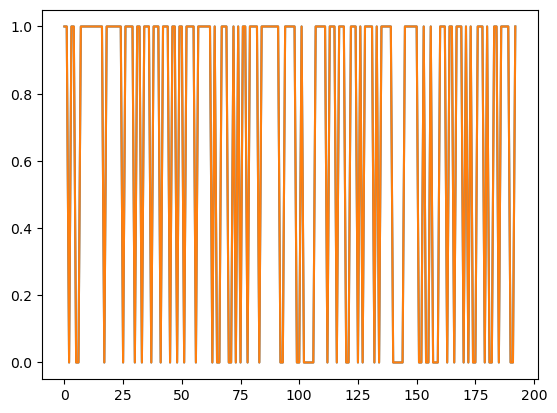

In [9]:
import matplotlib.pyplot as plt

plt.plot(classification_module)
plt.plot(genpop_df['Classification'])

In [10]:
cols_module

Index(['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Race_Asian',
       'Race_Black', 'Race_Latinx', 'Race_Other', 'Race_White', 'Immigrant_No',
       'Immigrant_Unknown', 'Immigrant_Yes', 'Education_Bachelor's degree',
       'Education_Graduate school/advanced degree',
       'Education_High school/GED', 'Education_Less than high school',
       'Education_Some college/trade school', 'Education_Unknown',
       'RelStatus_Boyfriend/girlfriend',
       'RelStatus_Divorced/separated/widowed', 'RelStatus_Married',
       'RelStatus_Single', 'RelStatus_Unknown', 'Employed_Not Working',
       'Employed_Not working', 'Employed_Unknown', 'Employed_Working',
       'Work_Blue collar', 'Work_In between', 'Work_Unknown',
       'Work_White collar', 'MilService_No', 'MilService_Yes', 'Arrested_No',
       'Arrested_Yes', 'ParentDivorce_No evidence', 'ParentDivorce_Yes',
       'SES_Lower class', 'SES_Middle class', 'SES_Unknown', 'SES_Upper class',
       'MentalIllness_No evidence

In [11]:
cols_notebook

Index(['Age', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Race_Asian',
       'Race_Black', 'Race_Latinx', 'Race_Other', 'Race_White', 'Immigrant_No',
       'Immigrant_Unknown', 'Immigrant_Yes', 'Education_Bachelor's degree',
       'Education_Graduate school/advanced degree',
       'Education_High school/GED', 'Education_Less than high school',
       'Education_Some college/trade school', 'Education_Unknown',
       'RelStatus_Boyfriend/girlfriend',
       'RelStatus_Divorced/separated/widowed', 'RelStatus_Married',
       'RelStatus_Single', 'RelStatus_Unknown', 'Employed_Not Working',
       'Employed_Not working', 'Employed_Unknown', 'Employed_Working',
       'Work_Blue collar', 'Work_In between', 'Work_Unknown',
       'Work_White collar', 'MilService_No', 'MilService_Yes', 'Arrested_No',
       'Arrested_Yes', 'ParentDivorce_No evidence', 'ParentDivorce_Yes',
       'SES_Lower class', 'SES_Middle class', 'SES_Unknown', 'SES_Upper class',
       'MentalIllness_No evidence

In [12]:
test_df.iloc[-1]

Age                               33
Gender                          Male
Race                          Latinx
Immigrant                    Unknown
Education                    Unknown
RelStatus                     Single
Employed                     Working
Work                     Blue collar
MilService                        No
Arrested                          No
ParentDivorce            No evidence
SES                     Middle class
MentalIllness            No evidence
MentalIllnessHistory     No evidence
Autism                   No evidence
HealthIssues             No evidence
Classification                     1
Name: 192, dtype: object